#**PROBLEM STATEMENT**

---


##   To build a powerful machine learning model that can accurately predict ticket prices.

###Flight ticket prices fluctuate based on factors like airline, route, departure time, duration, and demand. This project aims to analyze these factors using exploratory data analysis (EDA) and machine learning techniques to identify trends and predict ticket prices. By building a predictive model, we seek to help travelers make informed booking decisions and assist airlines in optimizing pricing strategies

Features :
* Airline
* Date_of_journey
* Sources
* Destination
* Route
- Dep_time
- Arrival_Time
- Duration
- Total_Stops
- Additional_Info
- Price

# Understand The Data


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/Flight_Ticket(1).csv') #Load_Data
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
# Check data types and missing values
df.info()
#route and total_stops have one null value
#features('Dep_Time', 'Arrival_Time', 'Duration',date_of_journey) need to be converted to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#it's used to find the statistical measurment
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.nunique() # unique values count in each feature

,0
Airline,12
Date_of_Journey,44
Source,5
Destination,6
Route,128
Dep_Time,222
Arrival_Time,1343
Duration,368
Total_Stops,5
Additional_Info,10


In [ ]:
df.duplicated().sum() #220 duplicates in this dataset

np.int64(220)

In [ ]:
#check to value count s in all columns
for i in df.columns:
  print(df[i].value_counts())  # 8345 No info in additional_info
  #  print('----------------------------------------------------------------------------------------------------------------)

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    

* 10683 rows and 11 columns
* route and total_stops have only one null value
* 220 duplicates in this dataset
* Route needs to be drop because Total_Stops already captures stop information, Duration already captures travel time
* features('Dep_Time', 'Arrival_Time', 'Duration',date_of_journey) need to be converted to datetime

#Data Cleaning

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df.duplicated().sum()

np.int64(220)

In [ ]:
df.drop_duplicates(inplace=True)#drop the duplicates

In [ ]:
df.dropna(inplace=True)# remove null values


In [ ]:
df.shape

(10462, 11)

In [ ]:
df.drop('Route',axis=1,inplace=True) # drop Route feature

#Feature Engineering

##Date_of_Journey

In [ ]:
# Convert Date_of_Journey to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

print(df['Date_of_Journey'].dtype)

datetime64[ns]


In [ ]:
#extract meaningful parts like day, month, and weekday . This Helps capture seasonal patterns.

df["Journey_Day"] = df["Date_of_Journey"].dt.day # Extracted day
df["Journey_Month"] = df["Date_of_Journey"].dt.month #Extracted month



* Ticket prices change by month (holiday seasons are expensive).



In [ ]:
df.drop(columns=["Date_of_Journey"], inplace=True)


In [ ]:
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [ ]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object
Price,int64
Journey_Day,int32


##dep_Time  and Arrival_Time

In [ ]:
# Convert to datetime format
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])

# Define Day (1) and Night (0) based on hour
df["Dep_DayNight"] = (df["Dep_Time"].dt.hour >= 6) & (df["Dep_Time"].dt.hour < 18)
df["Dep_DayNight"] = df["Dep_DayNight"].astype(int)  # Convert to 0 or 1

df["Arrival_DayNight"] = (df["Arrival_Time"].dt.hour >= 6) & (df["Arrival_Time"].dt.hour < 18)
df["Arrival_DayNight"] = df["Arrival_DayNight"].astype(int)  # Convert to 0 or 1

# Show the first few rows
df[["Dep_Time", "Dep_DayNight", "Arrival_Time", "Arrival_DayNight"]].head()


<ipython-input-228-0a764a0fa4b1>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])
<ipython-input-228-0a764a0fa4b1>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])


,Dep_Time,Dep_DayNight,Arrival_Time,Arrival_DayNight
0,2025-04-04 22:20:00,0,2025-03-22 01:10:00,0
1,2025-04-04 05:50:00,0,2025-04-04 13:15:00,1
2,2025-04-04 09:25:00,1,2025-06-10 04:25:00,0
3,2025-04-04 18:05:00,0,2025-04-04 23:30:00,0
4,2025-04-04 16:50:00,1,2025-04-04 21:35:00,0


In [ ]:
df.drop(columns=["Dep_Time","Arrival_Time"], inplace=True)

In [ ]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_DayNight,Arrival_DayNight
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,0,1
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,1,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,4,0,0
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,27,4,0,0
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,27,4,1,1
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,1,3,1,1


## Duration

In [ ]:
def simple_convert_duration(duration):
    # Default values
    hours = 0
    minutes = 0

    # Extract hours and minutes if present
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('h')[-1].replace('m', '').strip())

    # Return as HH:MM format
    return f'{hours:02d}:{minutes:02d}'

# Apply the function
df['Duration'] = df['Duration'].apply(simple_convert_duration)

# Display the updated column
print(df['Duration'])


0        02:50
1        07:25
2        19:00
3        05:25
4        04:45
         ...  
10678    02:30
10679    02:35
10680    03:00
10681    02:40
10682    08:20
Name: Duration, Length: 10462, dtype: object


In [ ]:
# Split into hours and minutes
df['Duration_Hours'] = df['Duration'].str.split(':').str[0].astype(int)
df['Duration_Minutes'] = df['Duration'].str.split(':').str[1].astype(int)

# Convert to total minutes
df['Duration_Total_Minutes'] = df['Duration_Hours'] * 60 + df['Duration_Minutes']

# Drop intermediate columns if needed
df.drop(['Duration_Hours', 'Duration_Minutes','Duration'], axis=1, inplace=True)

In [ ]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_DayNight,Arrival_DayNight,Duration_Total_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,0,0,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,0,1,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,1,0,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,0,0,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,1,0,285
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,0,0,150
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,0,0,155
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,1,1,180
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,1,1,160


Helps correlate longer travel times with lower prices.

In [ ]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_DayNight,Arrival_DayNight,Duration_Total_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,0,0,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,0,1,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,1,0,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,0,0,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,1,0,285
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,0,0,150
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,0,0,155
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,1,1,180
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,1,1,160


In [ ]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Total_Stops,object
Additional_Info,object
Price,int64
Journey_Day,int32
Journey_Month,int32
Dep_DayNight,int64
Arrival_DayNight,int64


##Addintional_info

In [ ]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8182
In-flight meal not included,1926
No check-in baggage included,318
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [ ]:
df.drop('Additional_Info',axis=1,inplace=True) # dropping feature 'Additional_Info' because there is no info of about 8185 values in this column.

In [ ]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_DayNight,Arrival_DayNight,Duration_Total_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,0,0,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,0,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,1,0,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,0,0,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,1,0,285
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,0,0,150
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,0,0,155
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,1,1,180
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,1,1,160


#visualization    

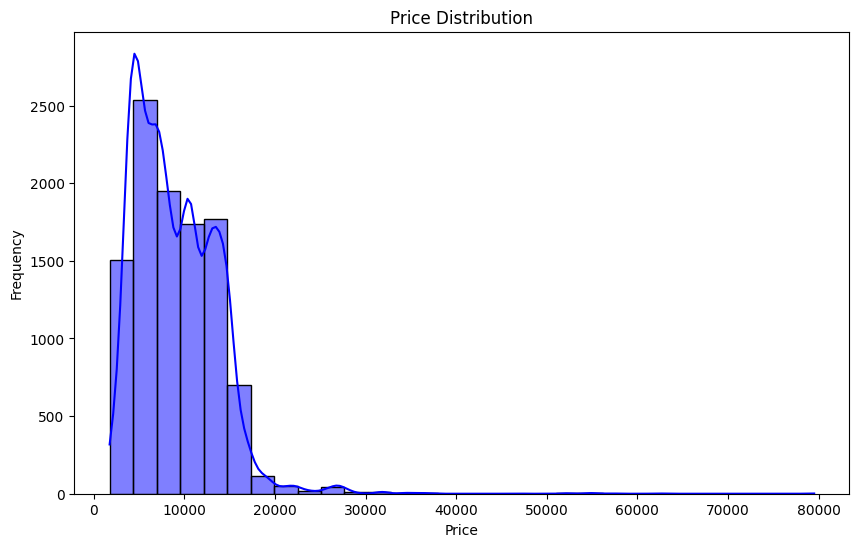

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

* Cheapest tickets: The cheapest tickets shown in the chart are priced below INR 5000. These tickets are usually for short domestic flights
* Most Popular Tickets: The most popular tickets are in the price range of INR 5,000 to 10,000. These tickets are usually for medium-haul domestic flights.
* Most Expensive Tickets: The most expensive tickets shown in the chart cost more than INR 80,000. These tickets are usually for international flights or domestic flights in business or first class.

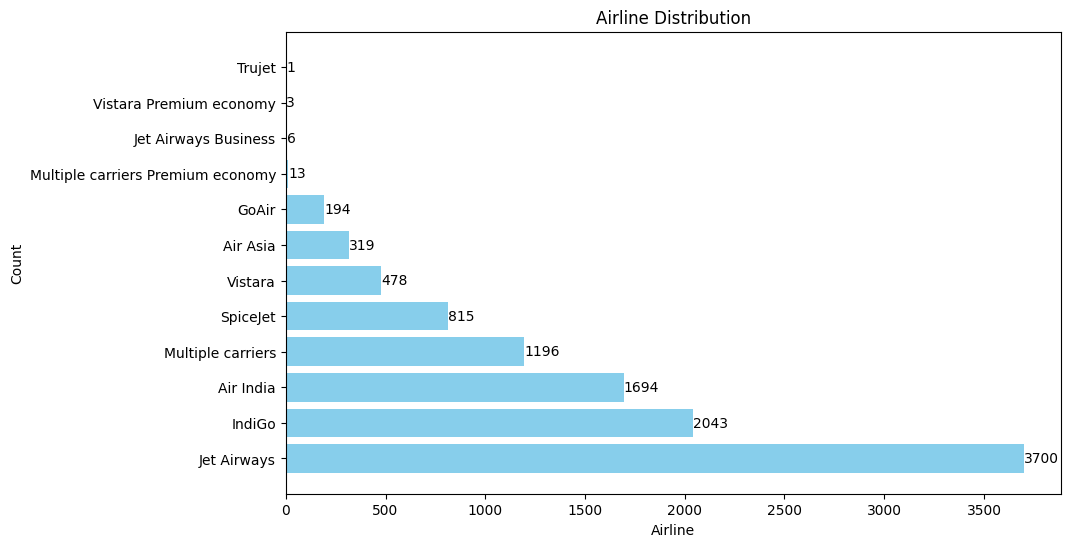

In [ ]:
d_1=dict(df['Airline'].value_counts())
values = list(d_1.values())

plt.figure(figsize=(10, 6))
plt.barh(list(d_1.keys()), list(d_1.values()), color='skyblue')
for i in range(len(d_1.keys())):
    plt.text(values[i], i, str(values[i]), va='center')
plt.title('Airline Distribution')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

* IndiGo: With 2,053 flights, it has the most number of flights among the airlines in the chart.

* Jet Airways: With 3,849 flights, it is the second busiest airline in the chart.

* Air India: With 1751 flights, it is the third busiest airline in the chart.

* Vistara: With 479 flights, it is the fourth busiest airline in the chart.Three-stop flights: 927 flights have three stops on the chart. These flights are usually only offered for very long routes or to destinations to which there are no direct flights or with fewer stops.

* SpiceJet: With 818 flights, it is the fifth busiest airline in the chart.

* The other airlines in the chart each have fewer flights than the airlines listed above

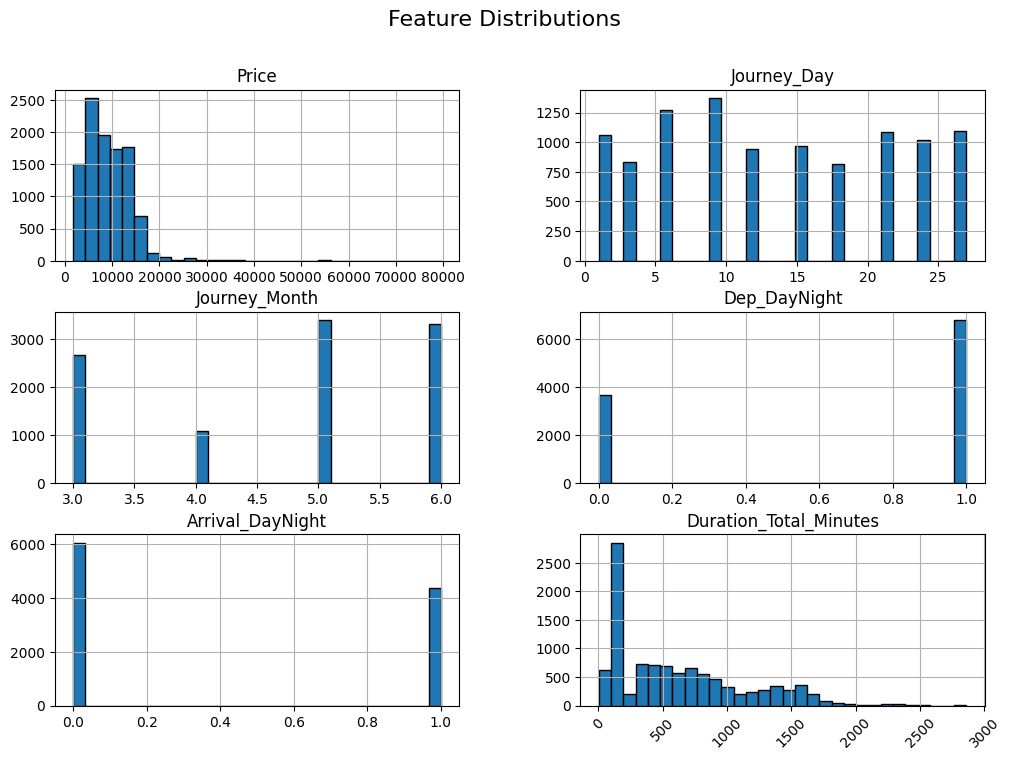

In [ ]:
#Distribution of All Numerical Features
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.xticks(rotation=45)
plt.show()

* Flight Prices are often right-skewed because most tickets are affordable, but a few premium flights are expensive.
*  The Duration_Minutes feature may have some extreme values for long-haul flights.


<ipython-input-242-b28b6c1dbfe9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Dep_DayNight"], y=df["Price"], palette="coolwarm", estimator=np.mean)
<ipython-input-242-b28b6c1dbfe9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Arrival_DayNight"], y=df["Price"], palette="muted", estimator=np.mean)


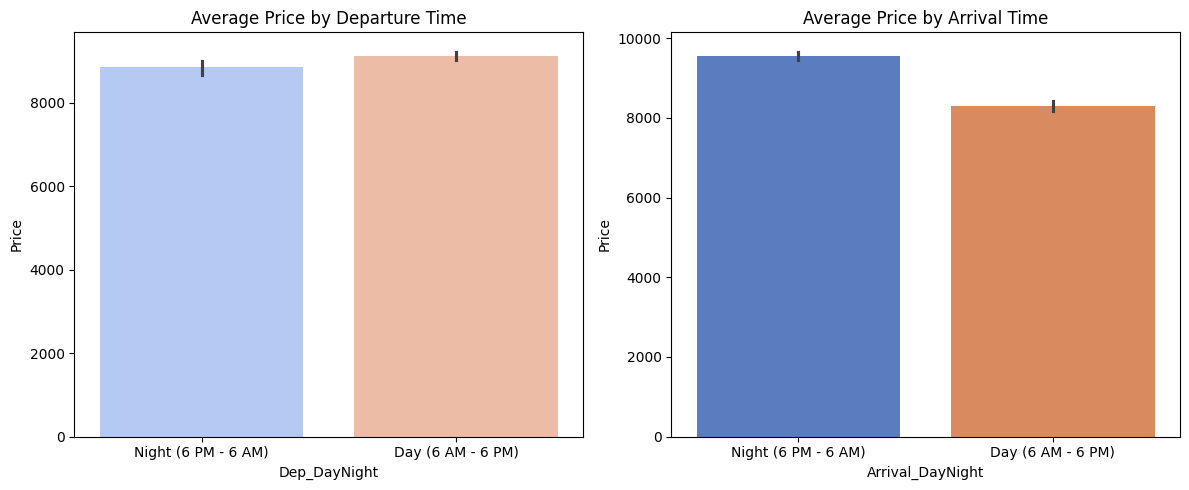

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Bar Plot for Departure Time (Day/Night) vs. Price
plt.subplot(1, 2, 1)
sns.barplot(x=df["Dep_DayNight"], y=df["Price"], palette="coolwarm", estimator=np.mean)
plt.xticks([0, 1], ["Night (6 PM - 6 AM)", "Day (6 AM - 6 PM)"])
plt.title("Average Price by Departure Time")

# Bar Plot for Arrival Time (Day/Night) vs. Price
plt.subplot(1, 2, 2)
sns.barplot(x=df["Arrival_DayNight"], y=df["Price"], palette="muted", estimator=np.mean)
plt.xticks([0, 1], ["Night (6 PM - 6 AM)", "Day (6 AM - 6 PM)"])
plt.title("Average Price by Arrival Time")

plt.tight_layout()
plt.show()


* if flights departing during the day are more expensive than night flights
*  if flights arriving during the day have higher prices than night arrivals.

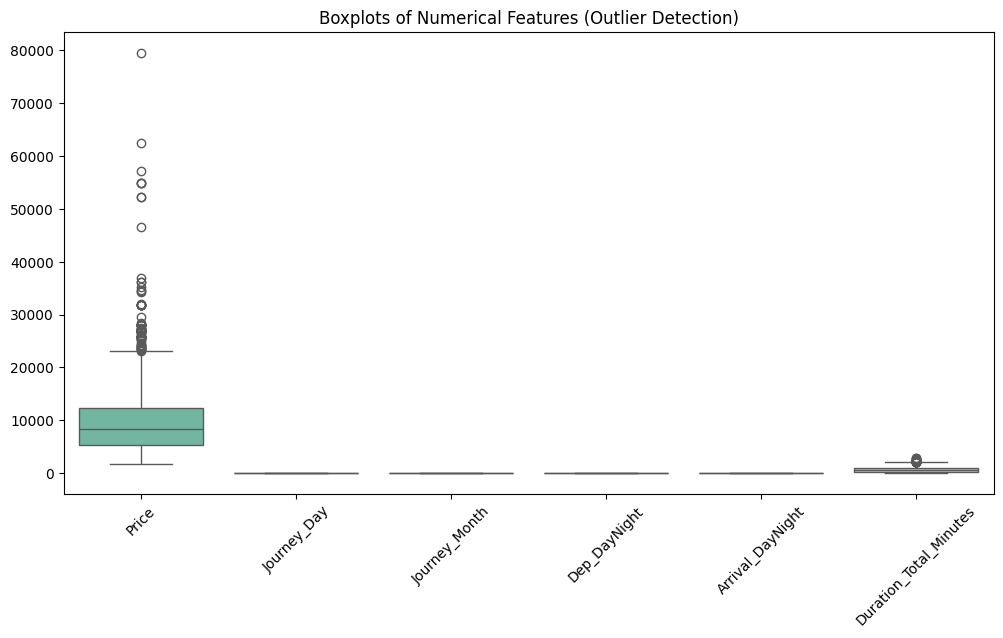

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=["number"]), palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features (Outlier Detection)")
plt.show()

*  longer flights tend to be more expensive.

*  then flight duration may not strongly impact price

<ipython-input-244-afa637a2bb51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Airline", data=df, order=df["Airline"].value_counts().index, palette="viridis")


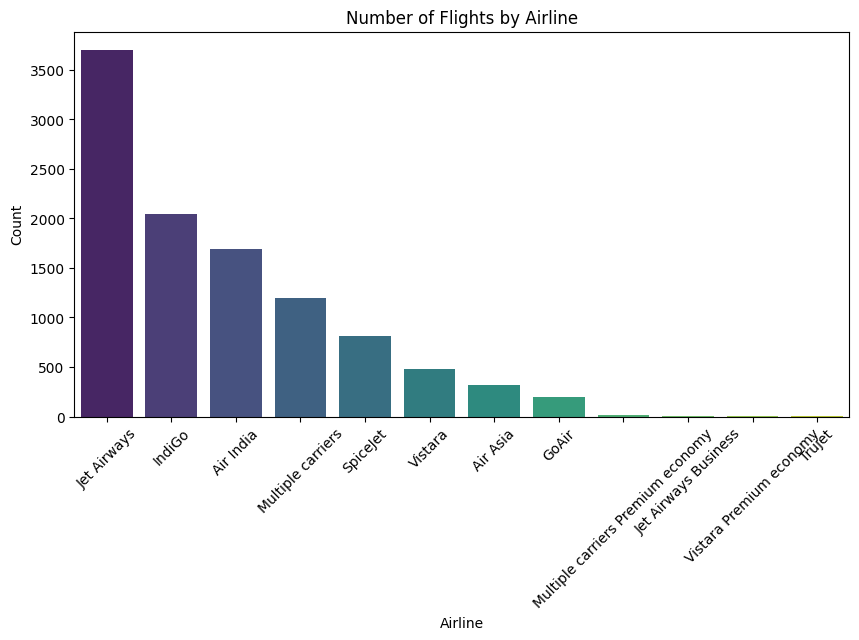

In [ ]:
#Number of Flights by Airline
plt.figure(figsize=(10, 5))
sns.countplot(x="Airline", data=df, order=df["Airline"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Number of Flights by Airline")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.show()

* Jet Airways  has the highest count, it means it operates the most flights.

* Trujet has the lowest count

<ipython-input-245-7a6706a1cc24>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Source"], palette="coolwarm")
<ipython-input-245-7a6706a1cc24>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Destination"],  palette="coolwarm")


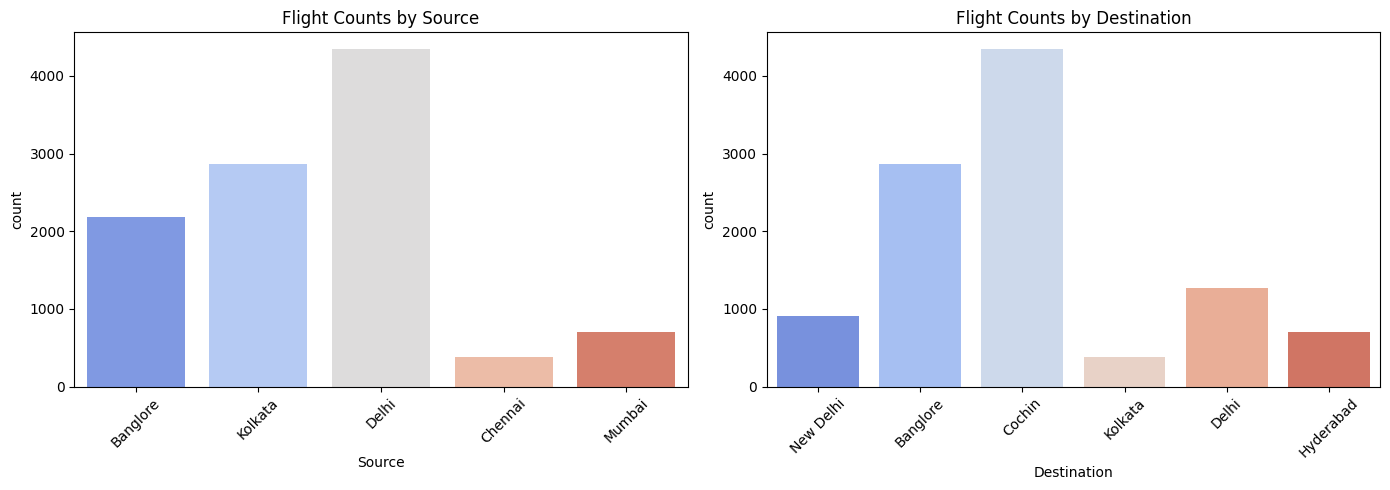

In [ ]:
plt.figure(figsize=(14, 5))

# Flights by Source
plt.subplot(1, 2, 1)
sns.countplot(x=df["Source"], palette="coolwarm")
plt.title("Flight Counts by Source")
plt.xticks(rotation=45)

# Flights by Destination
plt.subplot(1, 2, 2)
sns.countplot(x=df["Destination"],  palette="coolwarm")
plt.title("Flight Counts by Destination")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


* Delhi has the highest number of departing flights, meaning it's a major hub
* Cochin is the most common destination, receiving the highest number of flights.


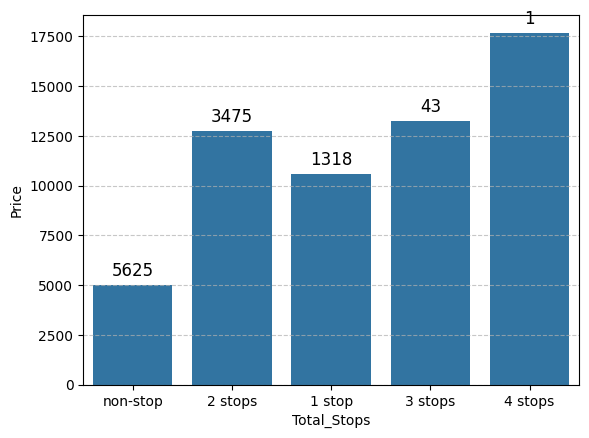

In [ ]:

# Get the count of each unique value in 'Total_Stops'
stop_counts = df['Total_Stops'].value_counts()

# Create the barplot
ax = sns.barplot(x='Total_Stops', y='Price', data=df, errorbar=None)

# Annotate the bars with the count of occurrences
# stop_counts.index gives the unique values in the 'Total_Stops' column
# Using enumerate to access both the index (stop_value) and count
for i, stop_value in enumerate(stop_counts.index):
    count = stop_counts[stop_value]  # Access count using the stop_value
    ax.annotate(f'{count}', (i, ax.patches[i].get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* As the number of stops increases, the average flight price tends to rise

<ipython-input-247-da28b736ba1a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Airline", y="Price", data=df, palette="pastel")


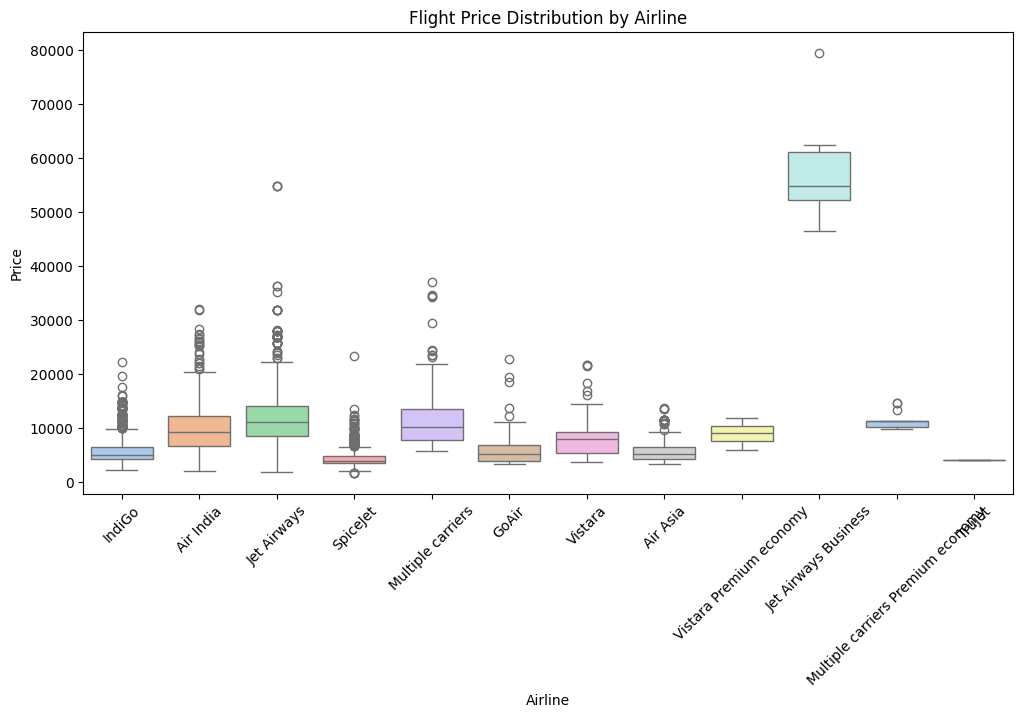

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Airline", y="Price", data=df, palette="pastel")
plt.xticks(rotation=45)
plt.title("Flight Price Distribution by Airline")
plt.show()


 * understand which airlines tend to charge more and price variation

<ipython-input-248-69c3724a7634>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Total_Stops", y= 'Duration_Total_Minutes', data=df, palette="magma")


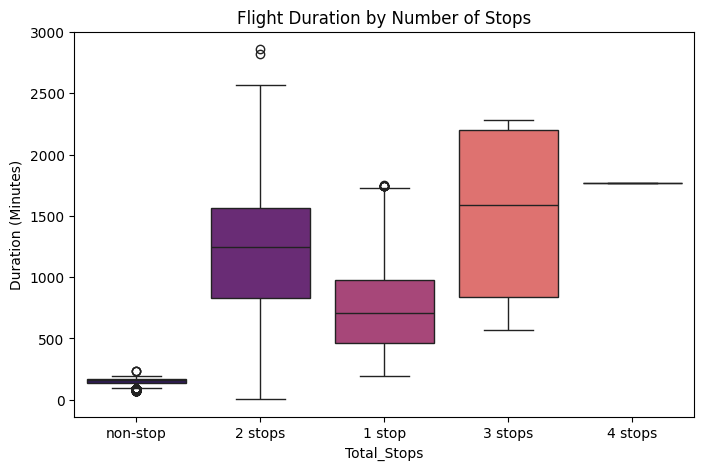

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Total_Stops", y= 'Duration_Total_Minutes', data=df, palette="magma")
plt.title("Flight Duration by Number of Stops")
plt.ylabel("Duration (Minutes)")
plt.show()


 * compare flight durations by number of stops
 * even spot outliers or data quality issues (like a 2-stop flight that’s faster than a non-stop!).



In [ ]:
df['Journey_Day']

,Journey_Day
0,24
1,1
2,9
3,12
4,1
...,...
10678,9
10679,27
10680,27
10681,1


In [ ]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_DayNight,Arrival_DayNight,Duration_Total_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,0,0,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,0,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,1,0,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,0,0,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,1,0,285
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,0,0,150
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,0,0,155
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,1,1,180
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,1,1,160


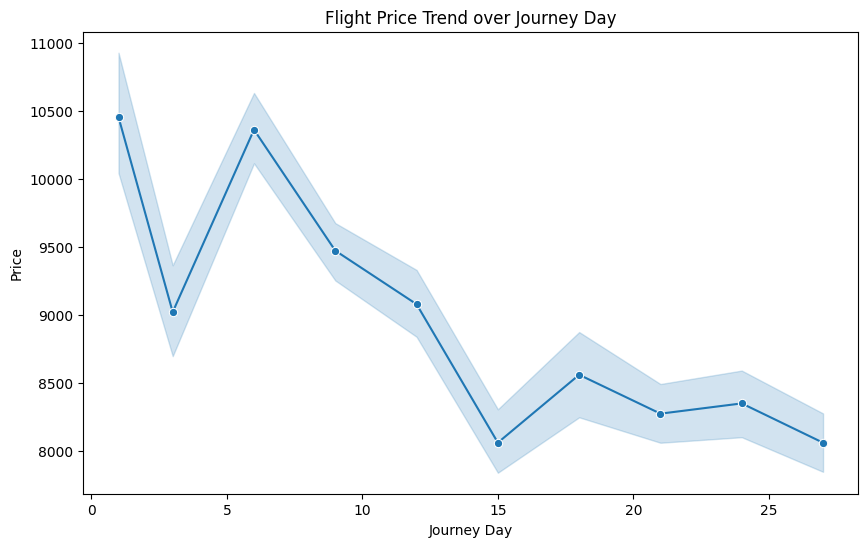

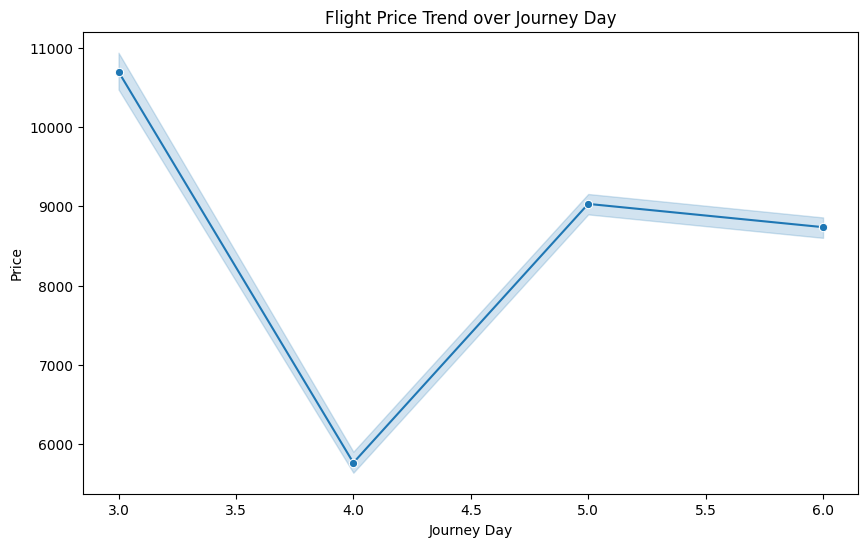

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Journey_Day", y="Price", data=df, marker='o')
plt.title("Flight Price Trend over Journey Day")
plt.xlabel("Journey Day")
plt.ylabel("Price")


plt.figure(figsize=(10,6))
sns.lineplot(x='Journey_Month', y="Price", data=df, marker='o')
plt.title("Flight Price Trend over Journey Day")
plt.xlabel("Journey Day")
plt.ylabel("Price")
plt.show()


* We can quickly observe how flight prices change over the days of the month.
* a consistent increase in prices toward the end of the month might indicate higher demand or booking pressures

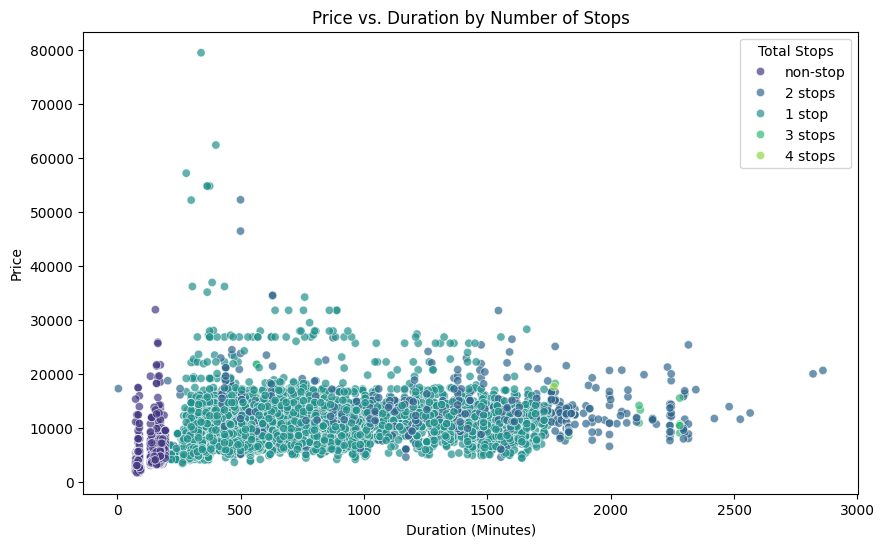

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Duration_Total_Minutes", y="Price", hue="Total_Stops", data=df, palette="viridis", alpha=0.7)
plt.title("Price vs. Duration by Number of Stops")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Price")
plt.legend(title="Total Stops")
plt.show()


 * We  can observe whether longer flights tend to have higher prices.

* Stops Influence: By using different colors for each number of stops, we can see if flights with more stops generally cost more or have longer durations compared to non-stop flights.

#Encoding

In [ ]:
# Frequency encoding for Source
source_counts = df['Source'].value_counts()
df['Source'] = df['Source'].map(source_counts)

# Frequency encoding for Destination
destination_counts = df['Destination'].value_counts()
df['Destination'] = df['Destination'].map(destination_counts)

In [ ]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_DayNight,Arrival_DayNight,Duration_Total_Minutes
0,IndiGo,2179,914,non-stop,3897,24,3,0,0,170
1,Air India,2860,2860,2 stops,7662,1,5,0,1,445
2,Jet Airways,4345,4345,2 stops,13882,9,6,1,0,1140
3,IndiGo,2860,2860,1 stop,6218,12,5,0,0,325
4,IndiGo,2179,914,1 stop,13302,1,3,1,0,285
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2860,2860,non-stop,4107,9,4,0,0,150
10679,Air India,2860,2860,non-stop,4145,27,4,0,0,155
10680,Jet Airways,2179,1265,non-stop,7229,27,4,1,1,180
10681,Vistara,2179,914,non-stop,12648,1,3,1,1,160


In [ ]:

# # Target Encoding: Replace 'Airline' with its mean price
# df["Airline"] = df.groupby("Airline")["Price"].transform("mean")

Airline_counts = df['Airline'].value_counts()
df['Airline'] = df['Airline'].map(Airline_counts)


In [ ]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_DayNight,Arrival_DayNight,Duration_Total_Minutes
0,2043,2179,914,non-stop,3897,24,3,0,0,170
1,1694,2860,2860,2 stops,7662,1,5,0,1,445
2,3700,4345,4345,2 stops,13882,9,6,1,0,1140
3,2043,2860,2860,1 stop,6218,12,5,0,0,325
4,2043,2179,914,1 stop,13302,1,3,1,0,285
...,...,...,...,...,...,...,...,...,...,...
10678,319,2860,2860,non-stop,4107,9,4,0,0,150
10679,1694,2860,2860,non-stop,4145,27,4,0,0,155
10680,3700,2179,1265,non-stop,7229,27,4,1,1,180
10681,478,2179,914,non-stop,12648,1,3,1,1,160


In [ ]:

# Extract numeric values
df["Total_Stops"] = df["Total_Stops"].str.extract("(\d+)").fillna(0).astype(int)


In [ ]:
# # Encoding 'Total_Stops' based on the mean price for each category
# stop_mean_price = df.groupby('Total_Stops')['Price'].mean()
# df['Total_Stops'] = df['Total_Stops'].map(stop_mean_price)


In [ ]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_DayNight,Arrival_DayNight,Duration_Total_Minutes
0,2043,2179,914,0,3897,24,3,0,0,170
1,1694,2860,2860,2,7662,1,5,0,1,445
2,3700,4345,4345,2,13882,9,6,1,0,1140
3,2043,2860,2860,1,6218,12,5,0,0,325
4,2043,2179,914,1,13302,1,3,1,0,285
...,...,...,...,...,...,...,...,...,...,...
10678,319,2860,2860,0,4107,9,4,0,0,150
10679,1694,2860,2860,0,4145,27,4,0,0,155
10680,3700,2179,1265,0,7229,27,4,1,1,180
10681,478,2179,914,0,12648,1,3,1,1,160


#Correlation Analysis

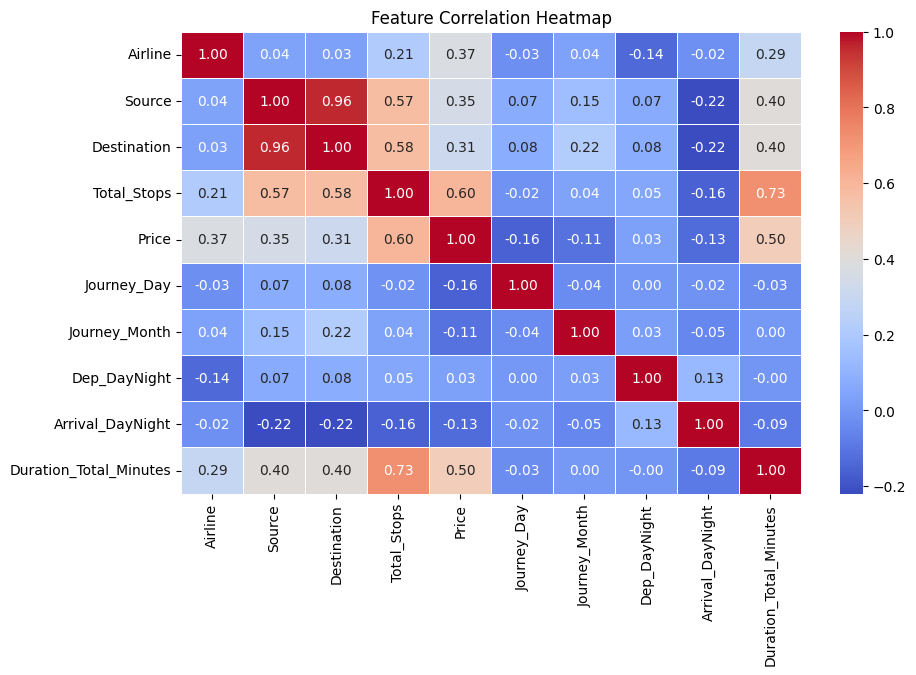

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

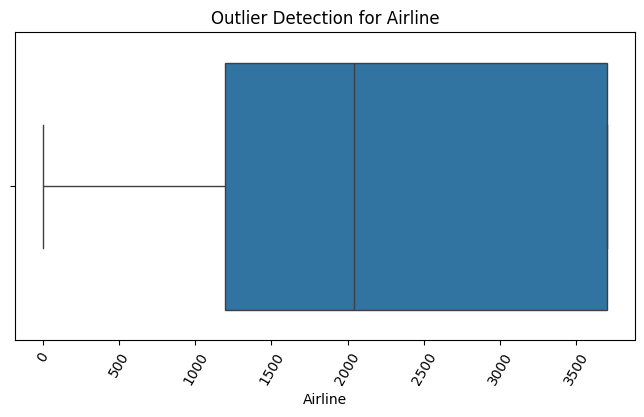

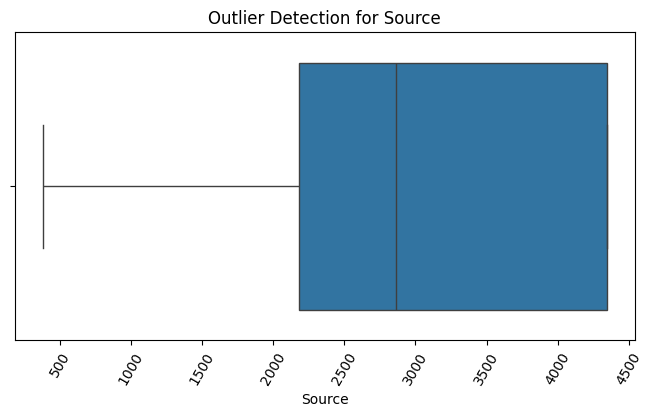

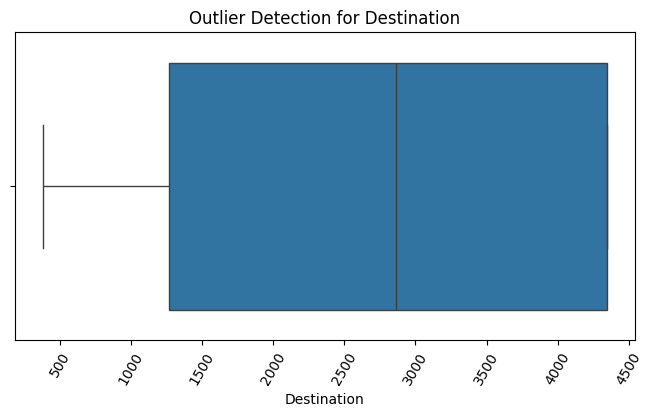

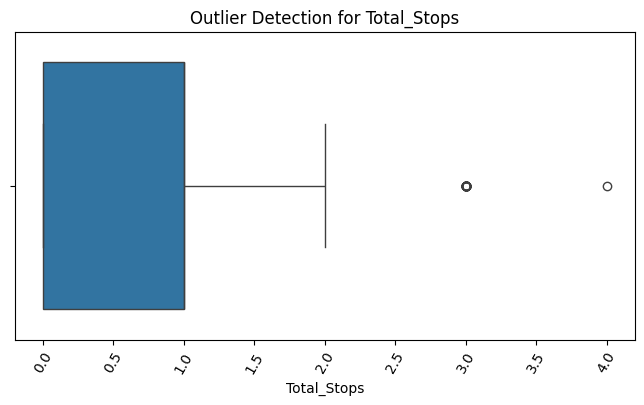

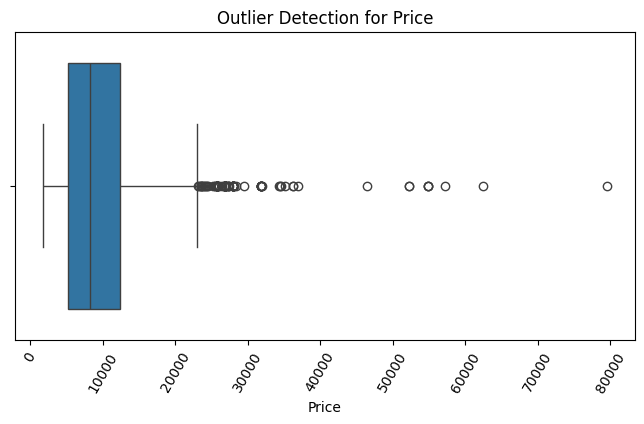

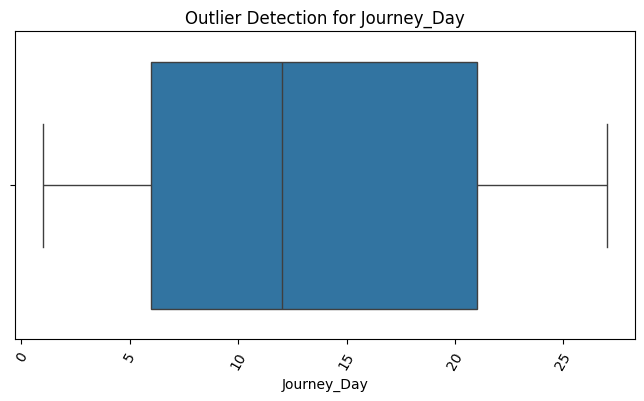

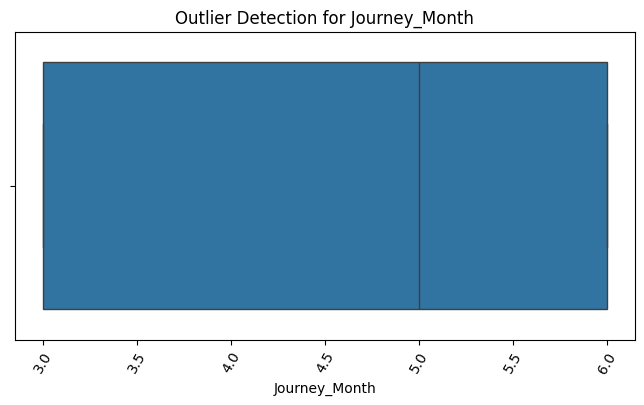

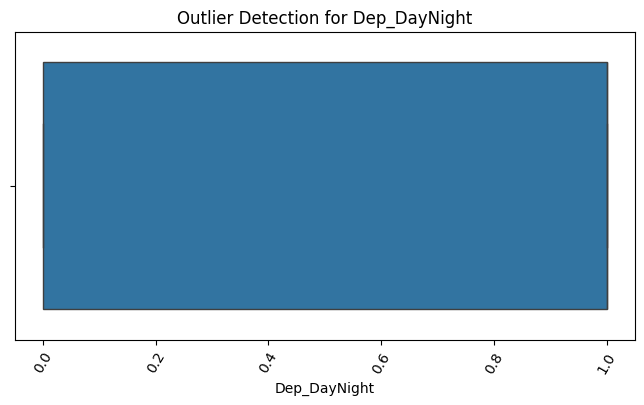

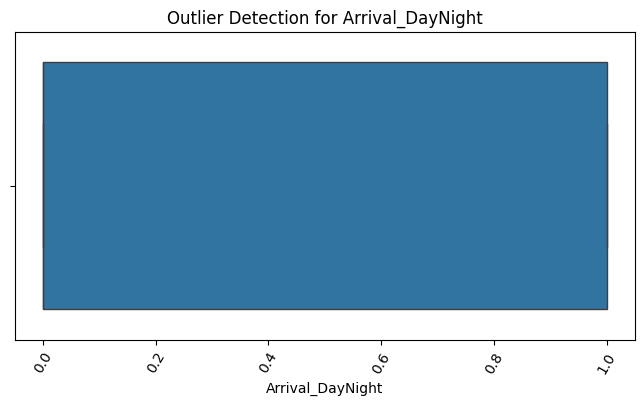

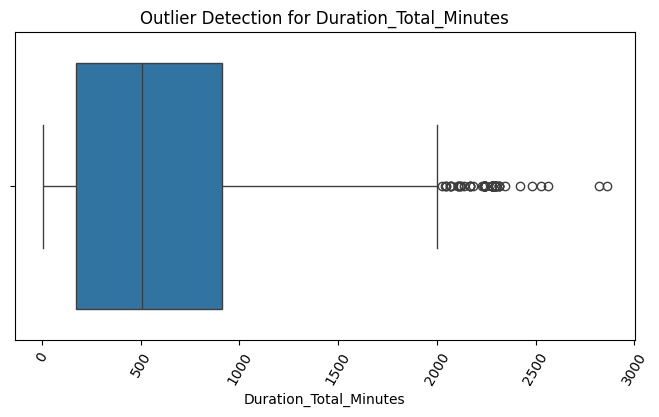

In [ ]:

# 1. Box Plot Visualization for all columns
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Outlier Detection for {column}')
    plt.xticks(rotation=60)
    plt.show()

In [ ]:
from scipy import stats


# # Compute Z-scores
# z_scores = np.abs(stats.zscore(df))

# # Remove rows where any column has a Z-score > 3
# df = df[(z_scores < 3).all(axis=1)]


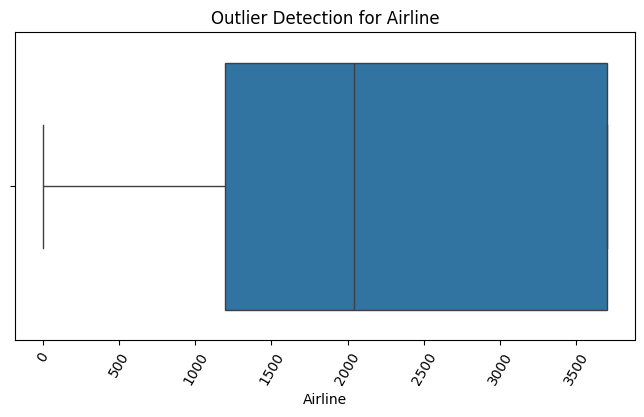

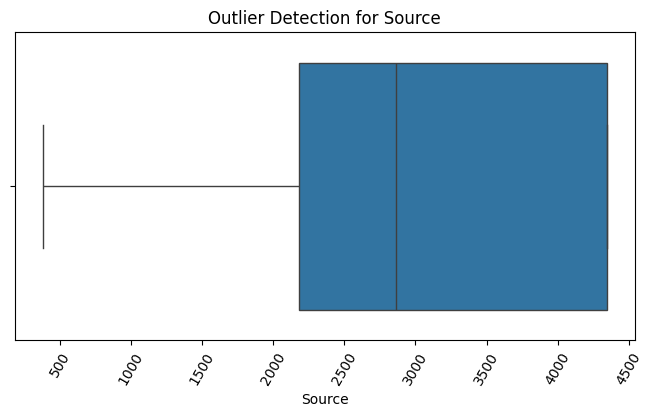

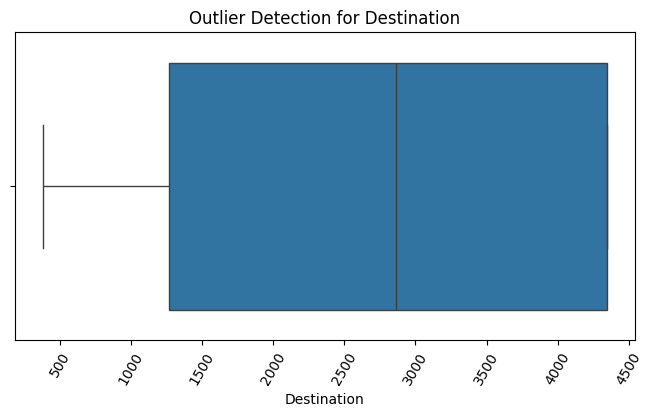

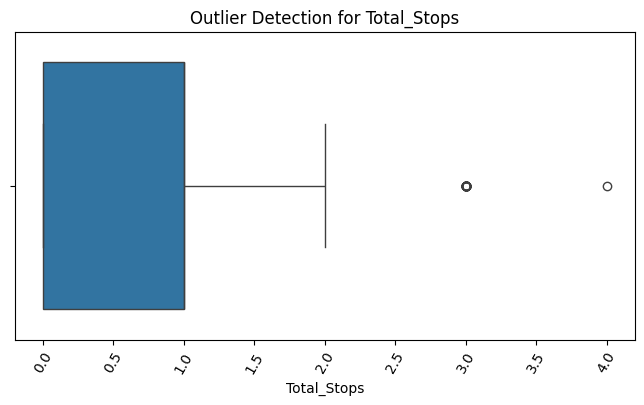

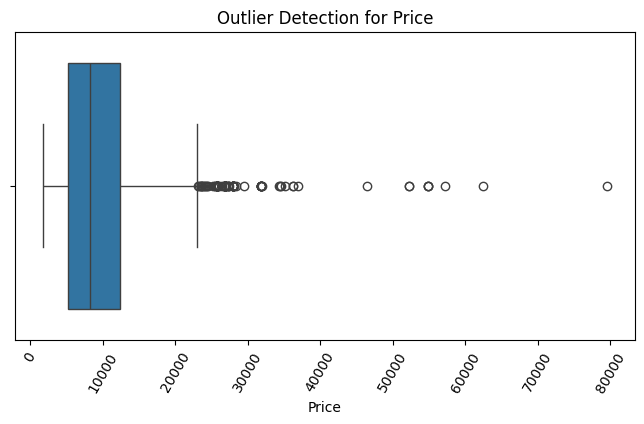

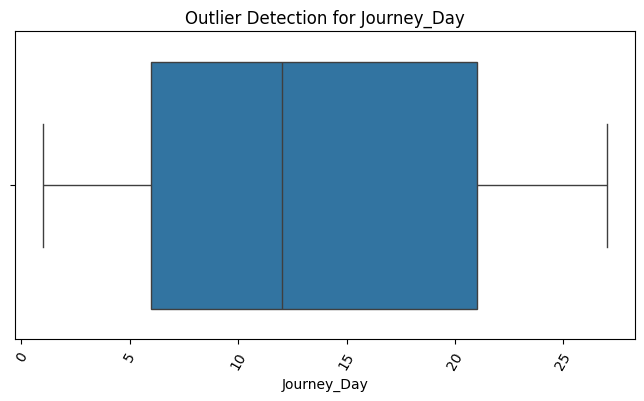

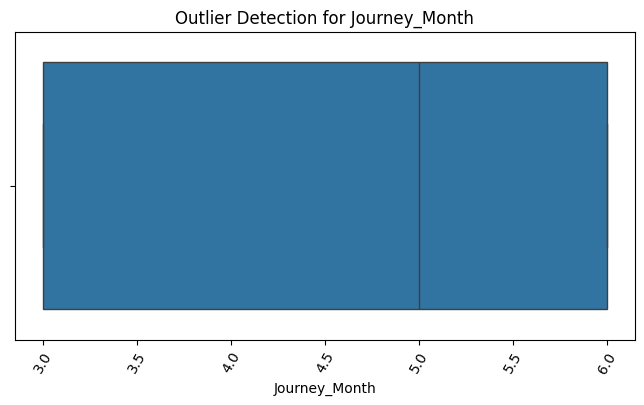

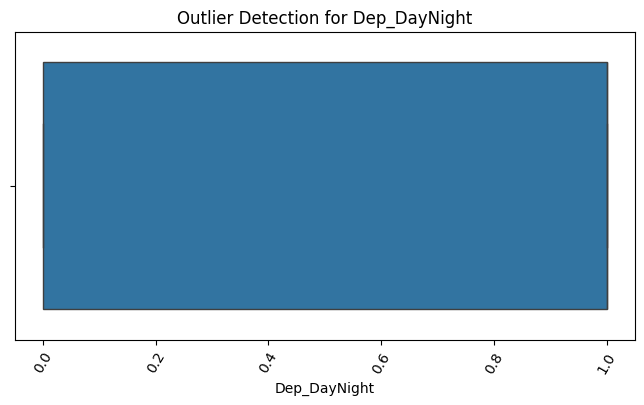

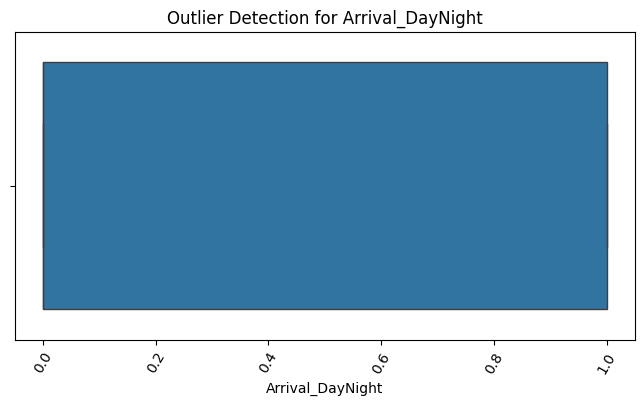

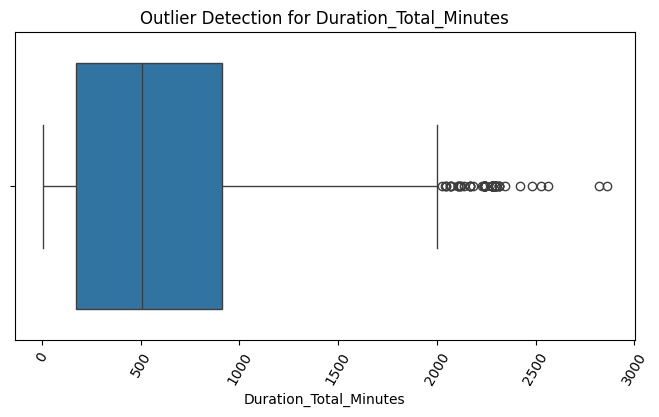

In [ ]:
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Outlier Detection for {column}')
    plt.xticks(rotation=60)
    plt.show()

#Remove Skew

In [ ]:
df.skew()

,0
Airline,0.096703
Source,-0.562953
Destination,-0.372732
Total_Stops,0.332309
Price,1.857490
Journey_Day,0.124628
Journey_Month,-0.377535
Dep_DayNight,-0.623210
Arrival_DayNight,0.324239
Duration_Total_Minutes,0.903973


In [ ]:

# # Visualize the distributions
# for col in df:
#     plt.figure(figsize=(6, 4))
#     sns.histplot(df[col], kde=True)
#     plt.title(f"Distribution of {col}")
#     plt.show()

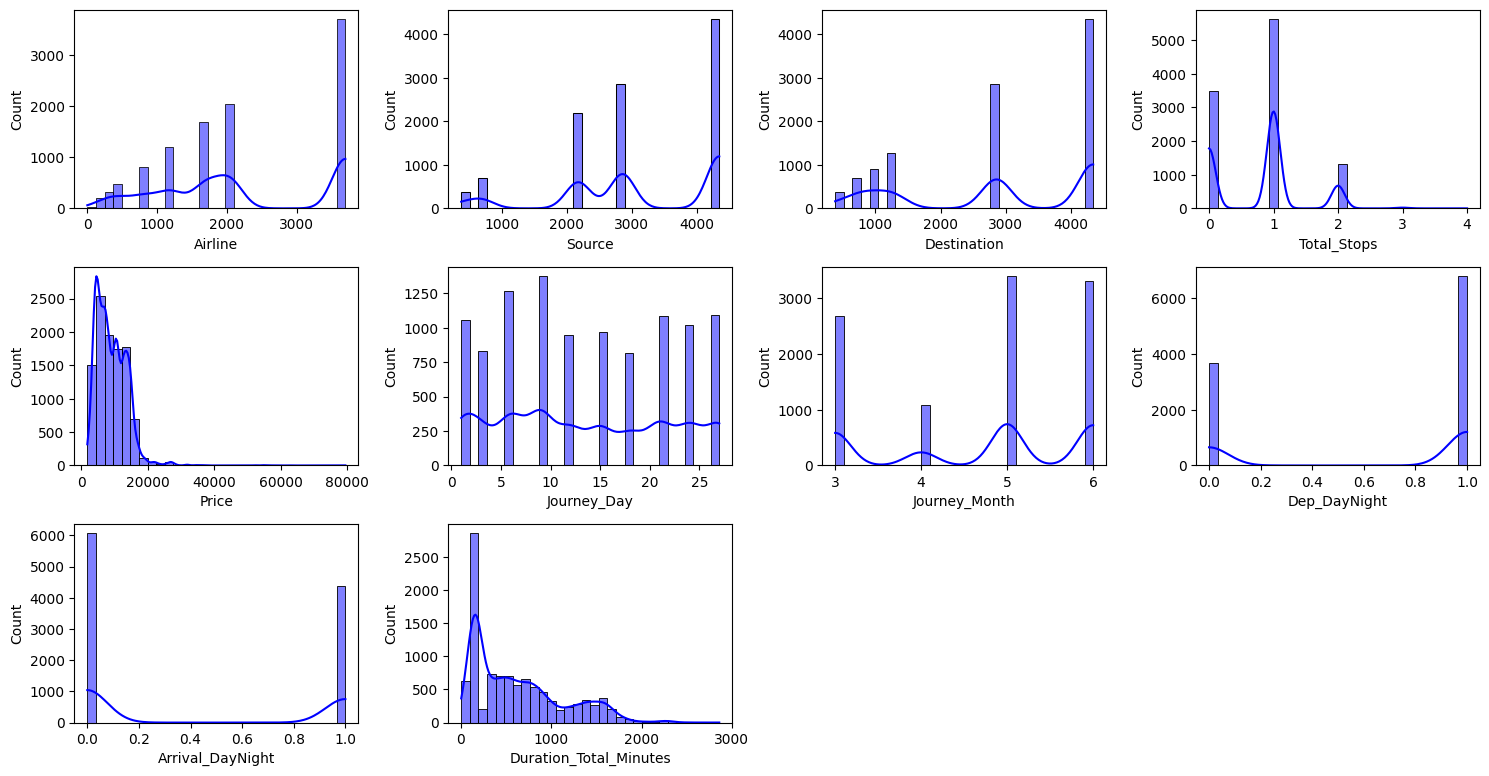

In [ ]:
from scipy.stats import skew

# Set up the plot size
plt.figure(figsize=(15, 10))

# Loop through all columns in the DataFrame
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)  # Create a subplot (adjust the grid as needed)

    # Plot the histogram
    sns.histplot(df[column], kde=True, color='blue', bins=30)

    plt.tight_layout()

plt.show()


In [ ]:
from scipy import stats
for col in df:
    if df[col].skew() > 1:
        df[col] = np.log1p(df[col])  # Log transformation for highly skewed columns
    elif df[col].skew() > 0.5:
        df[col] = np.sqrt(df[col])  # Square root transformation for moderate skewness
    elif df[col].min() > 0:  # Box-Cox works only for positive values
        df[col], _ = stats.boxcox(df[col])

In [ ]:
df.skew()

,0
Airline,-0.180624
Source,-0.325068
Destination,-0.381610
Total_Stops,0.332309
Price,-0.228106
Journey_Day,-0.251669
Journey_Month,-0.230632
Dep_DayNight,-0.623210
Arrival_DayNight,0.324239
Duration_Total_Minutes,0.371269


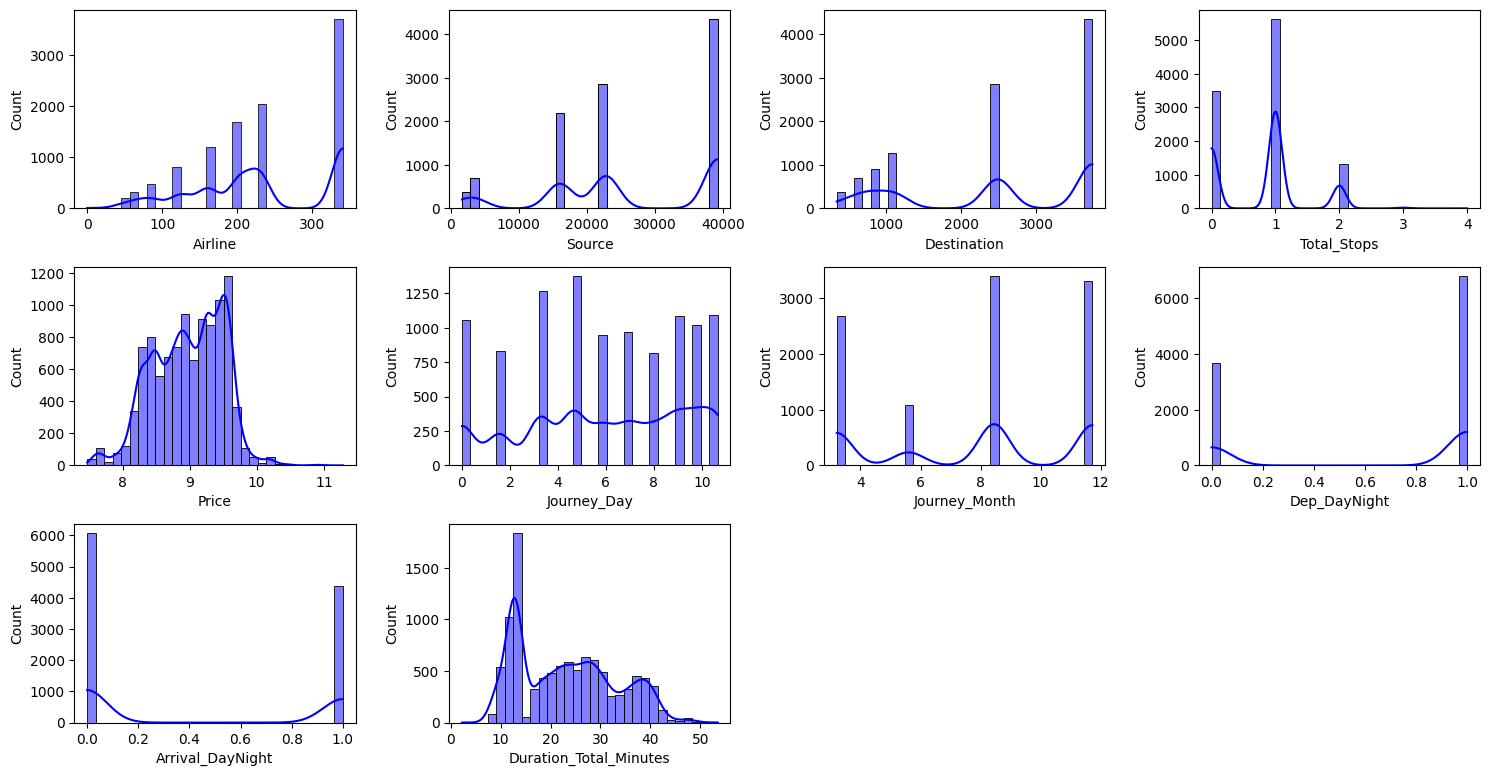

In [ ]:
#After Remove skew


plt.figure(figsize=(15, 10))

# Loop through all columns in the DataFrame
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)  # Create a subplot (adjust the grid as needed)

    # Plot the histogram
    sns.histplot(df[column], kde=True, color='blue', bins=30)

    plt.tight_layout()

plt.show()

#PCA

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Standardize the features before PCA
# features = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
#        'Journey_Day', 'Journey_Month', 'Journey_Weekday', 'Dep_Hour',
#        'Arrival_Hour', 'Duration_Minutes']
# X = StandardScaler().fit_transform(df[features])

# # Apply PCA
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(X)

# # Add PCA results to the DataFrame
# df['pca1'] = pca_result[:, 0]
# df['pca2'] = pca_result[:, 1]

# # Visualize PCA results
# sns.scatterplot(x='pca1', y='pca2', hue='Price', data=df)
# plt.title('PCA of Diamond Data')
# plt.show()

#Datascaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df.drop('Price', axis=1)  # Features
y = df['Price']               # Target variable


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Dictionary to store results
results = {}
# List of regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}


# Iterate through each model
for name, model in models.items():
    print(f"Training {name}")

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    mae, rmse, r2 = evaluate_model(y_test, y_pred)

    # Store the results
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# Display the results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

Training Linear Regression
Training Ridge Regression
Training Lasso Regression
Training ElasticNet Regression
Training Decision Tree
Training Random Forest
Training Gradient Boosting
Training K-Nearest Neighbors

Model: Linear Regression
MAE: 0.2438
RMSE: 0.3148
R²: 0.6266

Model: Ridge Regression
MAE: 0.2438
RMSE: 0.3148
R²: 0.6266

Model: Lasso Regression
MAE: 0.2953
RMSE: 0.3686
R²: 0.4878

Model: ElasticNet Regression
MAE: 0.2805
RMSE: 0.3539
R²: 0.5279

Model: Decision Tree
MAE: 0.1647
RMSE: 0.2538
R²: 0.7572

Model: Random Forest
MAE: 0.1420
RMSE: 0.2076
R²: 0.8375

Model: Gradient Boosting
MAE: 0.1691
RMSE: 0.2198
R²: 0.8179

Model: K-Nearest Neighbors
MAE: 0.1666
RMSE: 0.2300
R²: 0.8006


#Documentaion and Reporting

In [ ]:
# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with price': df.corr()['Price'].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")
# Prepare final dataset for modeling

final_df = df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_DayNight', 'Arrival_DayNight',
       'Duration_Total_Minutes']]

EDA Summary:
Dataset Shape: (10462, 10)
Missing Values: 0
Correlation with price: Price                     1.000000
Total_Stops               0.689212
Duration_Total_Minutes    0.665069
Source                    0.466353
Destination               0.432917
Airline                   0.395954
Dep_DayNight              0.066889
Journey_Month            -0.062947
Journey_Day              -0.127711
Arrival_DayNight         -0.150575
Name: Price, dtype: float64
